In [1]:
import Acquire.Client
import Acquire.Accounting

In [2]:
user = Acquire.Client.User("chryswoods")

http://fn.acquire-aaai.com:8080/t/identity/s?id=f9b224a0


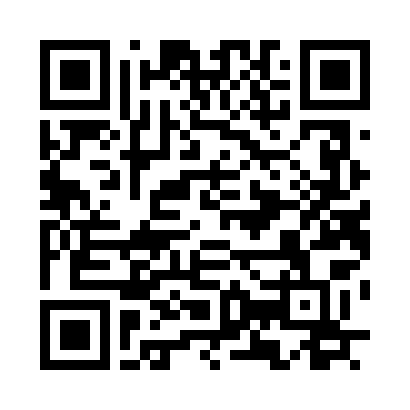

In [3]:
(url, qrcode) = user.request_login()
print(url)
qrcode

In [4]:
user.wait_for_login()
user.is_logged_in()

True

In [5]:
Acquire.Client.deposit(user=user, value=5.0)

{'status': 0,
 'message': 'Success',
 'transaction_records': [{'credit_note': {'account_uid': '5e881469-d772-4fd6-ae51-9123e5b68a38',
    'debit_account_uid': '6960f1e1-be98-40a6-8467-0a89363ebb09',
    'uid': '2019-02-20T16:52:48.504163/210ec9c7',
    'debit_note_uid': '2019-02-20T16:52:48.441335/e1c5b6e5',
    'datetime': '2019-02-20T16:52:48.504163',
    'value': '5.000000',
    'is_provisional': False},
   'debit_note': {'transaction': {'value': '5.000000',
     'description': 'Deposit on 2019-02-20 16:52:47.945436'},
    'account_uid': '6960f1e1-be98-40a6-8467-0a89363ebb09',
    'authorisation': {'user_uid': 'e2e31e35-025c-4a4c-8a7b-65da94e722d6',
     'session_uid': 'f9b224a0-44c7-4e53-aa87-4531726a31d9',
     'identity_url': 'http://fn.acquire-aaai.com:8080/t/identity',
     'identity_uid': 'fdac3ab5-3527-46f8-8432-c7ec8f586fc6',
     'auth_datetime': '2019-02-20T16:52:35.604625',
     'signature': 'M58vzSmqUO7TBv9TcUzUAXNmkjY5wBo5aoPmY5n1KtKy5CPPAUB1yBD+1OWrDVtztvkAVAzczMjy1lHl

In [7]:
accounts = Acquire.Client.get_accounts(user)

AccountError: Error calling 'get_account_uids' on 'http://fn.acquire-aaai.com:8080/t/accounting': There is no account called 'billing' in the group 'e2e31e35-025c-4a4c-8a7b-65da94e722d6'

In [ ]:
assert(len(accounts) > 1)

In [ ]:
for (i,account) in enumerate(accounts):
    print("%4d: %s - balance = %s" % (i, str(account), account.balance()))

In [ ]:
account0 = accounts[2]
account1 = accounts[3]
print(account0, account1)

In [ ]:
transaction = Acquire.Accounting.Transaction(3.5, "test transaction")

In [ ]:
record = account0.perform(transaction, account1)

In [ ]:
print(record)

In [ ]:
for (i,account) in enumerate(accounts):
    print("%4d: %s - balance = %s" % (i, str(account), account.balance()))

In [ ]:
user.logout()